In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hapod as hp

In [2]:
from tests.test_base import get_test_matrix_half_rank

X, U_true, s_true = get_test_matrix_half_rank(return_Us=True)
mask = ~np.isclose(s_true, 0)

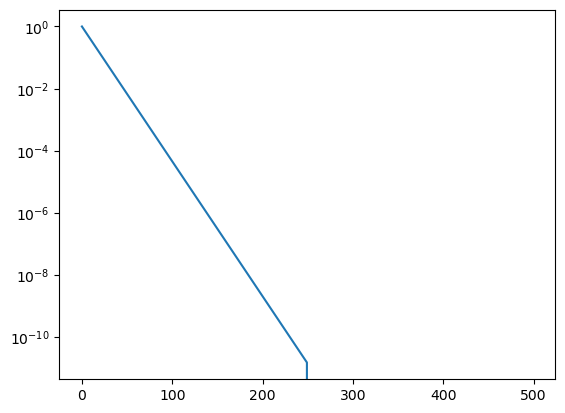

In [3]:
plt.semilogy(s_true)

plt.show()
plt.close()

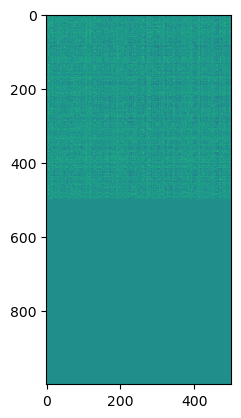

In [4]:
plt.imshow(X)

plt.show()
plt.close()

In [5]:
#perform hapod keeping the intermediate results in memory
U_hapod, s_hapod = hp.hapod(np.array_split(X, 4, axis=1),
                            chunk_rank_max=len(s_true)//2,
                            serializer=hp.InMemorySerializer(),
                            )

In [6]:
assert np.allclose(s_hapod[mask], s_true[mask])

In [7]:
ortho = hp.get_singular_vectors_orthogonality(U_hapod[:, mask], U_true[:, mask])

assert np.allclose(ortho, 1)